In [4]:
import pandas as pd

In [5]:
df = pd.read_csv('data/dataset.csv')
df.head()

,index,patent_kind,title,abstract,claim,n_claim,application_id,application_date,published_grant_id,published_date,...,wu-hsiung wu,xogen power inc.,xogen technologies inc.,yamaha corporation,yiutak leung,"yoshino gypsum co., ltd.",yuyun shang,ze chen,"zodiac pool systems, inc.","zurn industries, inc."
0,0,3,Turboengine water wash system,A system for cleaning gas turbine engines is d...,1. An apparatus for cleaning wing mounted gas ...,64,767,20061222,20080149141,20080626,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,1,TREATMENT OF TAILINGS WITH DEIONIZED SILICATE ...,A process for treating a tailings stream compr...,1. A process for treating a tailings stream co...,20,1271,20130321,20140007795,20140109,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,1,Method And Apparatus For Treating Tailings Usi...,There is a method described of treating tailin...,1. A method of treating tailings having a comb...,18,1260,20130213,20140008229,20140109,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,1,METHOD FOR STABILIZING WASTE AND HAZARDOUS WASTE,The invention provides a process for stabilizi...,"1. A method for stabilizing hazardous waste, c...",20,1261,20130214,20140005461,20140102,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,3,Water treatment process and plant using ballas...,A method for treating wastewater using a balla...,1. A method of treating wastewater including: ...,18,979,20071226,20100096335,20100422,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [27]:
df_1 = df.drop('title', axis=1)
df_1 = df_1.drop('abstract', axis=1)
df_1 = df_1.drop('claim', axis=1)

In [28]:
X = df_1.loc[:, df_1.columns!='valid_patent'].astype(str)
Y = df[['valid_patent']].astype(int).astype(str)
print(X.shape, y.shape)

(1905, 5566) (1905, 1)


In [29]:
from sklearn.preprocessing import StandardScaler
x_std = StandardScaler().fit_transform(X)

In [30]:
x_std

array([[-1.73114183,  1.99044979, -0.02382361, ..., -0.03971507,
        -0.02291746, -0.0324187 ],
       [-1.72932341, -0.42471381, -0.08880554, ..., -0.03971507,
        -0.02291746, -0.0324187 ],
       [-1.72750498, -0.42471381, -0.09175926, ..., -0.03971507,
        -0.02291746, -0.0324187 ],
       ..., 
       [ 1.72750498, -1.63229561, -0.11391219, ..., -0.03971507,
        -0.02291746, -0.0324187 ],
       [ 1.72932341, -1.63229561, -0.08880554, ..., -0.03971507,
        -0.02291746, -0.0324187 ],
       [ 1.73114183, -1.63229561, -0.08437495, ..., -0.03971507,
        -0.02291746, -0.0324187 ]])

In [40]:
from sklearn import decomposition
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

pca = decomposition.PCA(n_components=1)
sklearn_pca_x = pca.fit_transform(x_std)

In [41]:
sklearn_result = pd.DataFrame(sklearn_pca_x, columns=['PC1'])
sklearn_result['y-axis'] = 0.0
sklearn_result['label'] = Y

Text(0.5,1,'PCA result')

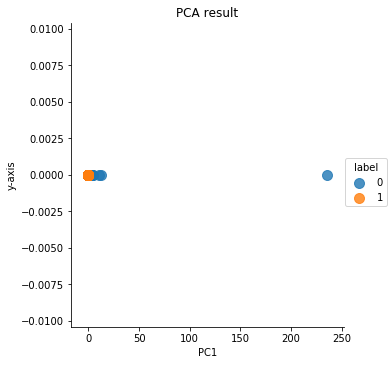

In [46]:
sns.lmplot('PC1', 'y-axis', data=sklearn_result, fit_reg=False, 
          scatter_kws={"s": 100}, hue='label')
plt.title('PCA result')